## Homework 11, Exercise 2

Efficiency:  3.1511


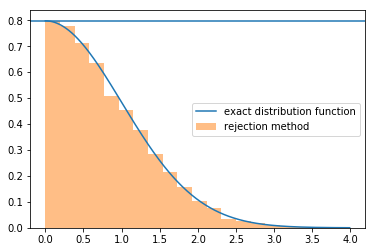

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_distr(x):
    return 2*np.exp(-x*x/2)/np.sqrt(2*np.pi)

rejection_data = []
maximum = 2/np.sqrt(2*np.pi)
cutoff = 4
N = 10000
counter = 0
while len(rejection_data)<N:
    counter += 1
    x = np.random.rand()*cutoff
    y = np.random.rand()*maximum
    if y < gauss_distr(x):
        rejection_data.append(x)

print("Efficiency: ", counter/N)
x = np.arange(0,cutoff,0.01)
plt.plot(x, gauss_distr(x), label = 'exact distribution function')
plt.axhline(maximum)
plt.hist(rejection_data, bins = 20, density = True, alpha = 0.5, label = 'rejection method')
plt.legend()
plt.show()

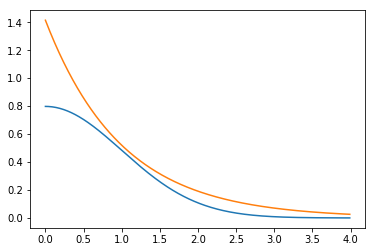

In [22]:
def comparison_fn(x):
    return np.sqrt(2)*np.exp(-x)

plt.plot(x, gauss_distr(x), label = 'p(x)')
plt.plot(x, comparison_fn(x), label = 'f(x)')
plt.show()

Efficiency:  1.4064


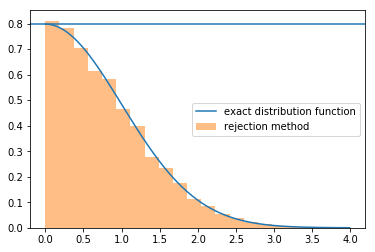

In [23]:
rejection_data = []
counter = 0
while len(rejection_data)<N:
    counter += 1
    x = np.random.exponential()
    y = np.random.rand()*comparison_fn(x)
    if y < gauss_distr(x):
        rejection_data.append(x)

print("Efficiency: ", counter/N)
x = np.arange(0,cutoff,0.01)
plt.plot(x, gauss_distr(x), label = 'exact distribution function')
plt.axhline(maximum)
plt.hist(rejection_data, bins = 20, density = True, alpha = 0.5, label = 'rejection method')
plt.legend()
plt.show()

## Exercise 3

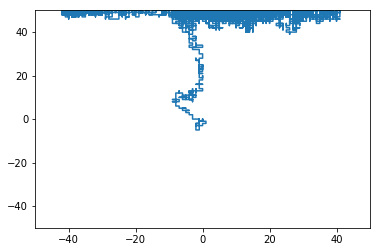

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nsteps=10000
L = int((101-1)/2)

trajectoryx = []
trajectoryy = []
walkerx = 0
walkery = 0

for k in range(nsteps):
    #print(walkerx, walkery)
    trajectoryx.append(walkerx)
    trajectoryy.append(walkery)
    sample = np.random.rand()
    if sample < 0.4 and walkery<L:
        walkery += 1
    elif sample < 0.6 and walkery>-L:
        walkery -= 1
    elif sample < 0.8 and walkerx<L:
        walkerx += 1
    elif walkerx>-L:
        walkerx -= 1

plt.plot(trajectoryx,trajectoryy)   
plt.xlim(-L,L)
plt.ylim(-L,L)
plt.show()

## Exercise 4

In [18]:
# volume of a hypersphere with Monte Carlo
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

counter_inside = 0
dim = 10
exact_value = np.pi**(dim/2)/factorial(dim/2)
volume_box = 2**dim

steps = 100000
for i in range(steps):
    point = 2*np.random.rand(dim) - 1
    
    if np.sqrt( np.sum(point**2) ) < 1:
        counter_inside += 1

volume = counter_inside/steps*volume_box
print("hypersphere volume = ", volume)
print("true value  = ", exact_value)   
print("accuracy: ", abs(volume-exact_value)/exact_value)

hypersphere volume =  2.6624
true value  =  2.550164039877345
accuracy:  0.04401127079184012
